<a href="https://colab.research.google.com/github/AftabUdaipurwala/PythonBasics/blob/main/Pandas_Time_Series_Analysis_6_Timezone_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/py-master/pandas/19_ts_timezone'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
alignment.png  pandas_timezone_handling.ipynb
msft.csv       timezones_world_map.png


In [11]:
# reading  data in the file
df = pd.read_csv('/content/drive/MyDrive/py-master/pandas/19_ts_timezone/msft.csv', header=1,index_col='Date Time',parse_dates=True) # its important to parse dates before performing any datetime operation
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


We live in a world with different timezones. If you are having morning coffee in new york at 9 AM it might be a time for dinner in Mumbai, India because it would be 6.30 PM there. Handling time zone could become necessity while doing time series analysis in Pandas

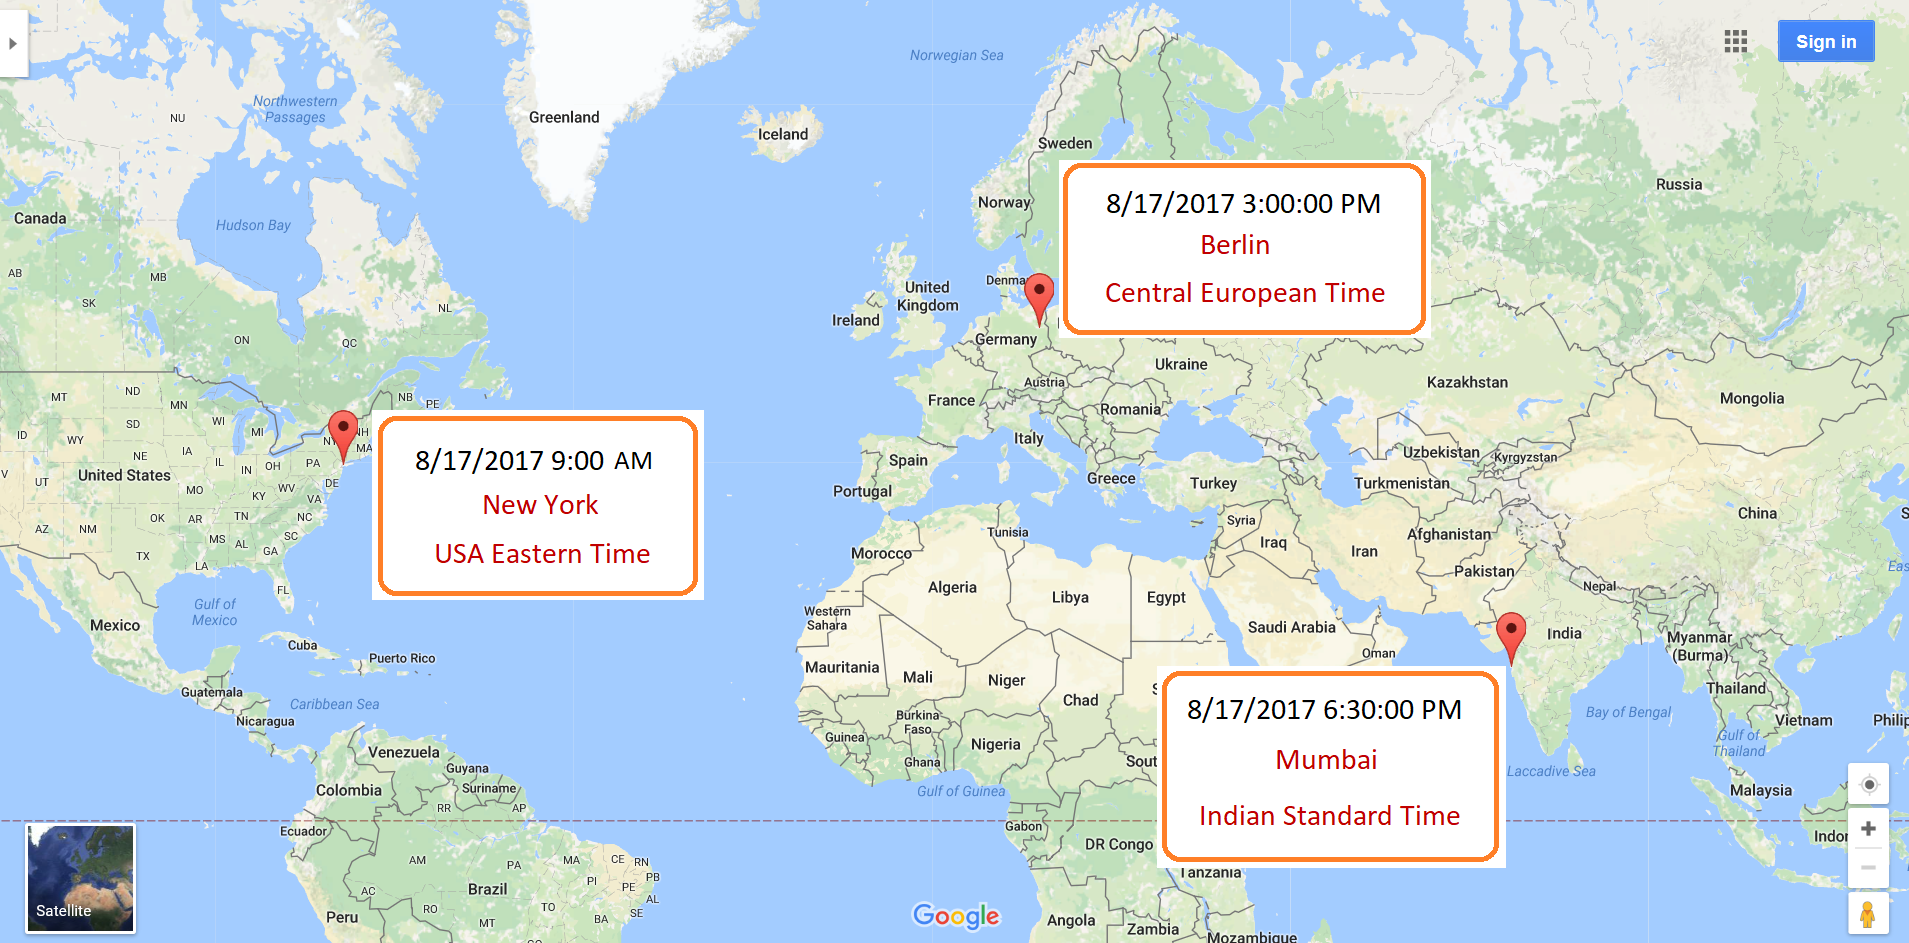

In [12]:
df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

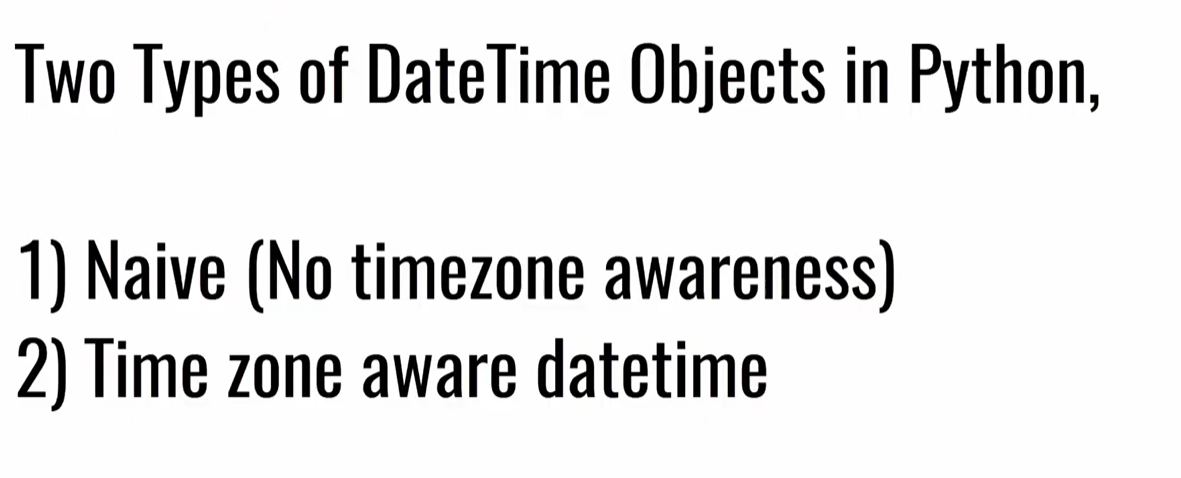

#Convert naive DatetimeIndex to timezone aware DatetimeIndex using tz_localize

In [17]:
df= df.tz_localize(tz='US/Eastern')
df

,Price
Date Time,
2017-08-17 09:00:00-04:00,72.38
2017-08-17 09:15:00-04:00,71.00
2017-08-17 09:30:00-04:00,71.67
2017-08-17 10:00:00-04:00,72.80
2017-08-17 10:30:00-04:00,73.00
2017-08-17 11:00:00-04:00,72.50


#Convert to Berlin time using tz_convert

In [18]:
df = df.tz_convert('Europe/Berlin')
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [19]:
df.index

DatetimeIndex(['2017-08-17 15:00:00+02:00', '2017-08-17 15:15:00+02:00',
               '2017-08-17 15:30:00+02:00', '2017-08-17 16:00:00+02:00',
               '2017-08-17 16:30:00+02:00', '2017-08-17 17:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='Date Time', freq=None)

In [20]:
from pytz import all_timezones
print (all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

#Convert to Mumbai time

In [21]:
df.index = df.index.tz_convert('Asia/Calcutta') # tz database doesn't have any Mumbai timezone but calcutta and mumbai are both in same timezone so we will use that
df

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


#Using timezones in date_range

In [22]:
london = pd.date_range('3/6/2012 00:09:00', periods=10, freq='H',tz='Europe/London')
london

DatetimeIndex(['2012-03-06 00:09:00+00:00', '2012-03-06 01:09:00+00:00',
               '2012-03-06 02:09:00+00:00', '2012-03-06 03:09:00+00:00',
               '2012-03-06 04:09:00+00:00', '2012-03-06 05:09:00+00:00',
               '2012-03-06 06:09:00+00:00', '2012-03-06 07:09:00+00:00',
               '2012-03-06 08:09:00+00:00', '2012-03-06 09:09:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

#Airthmetic between different timezones

In [23]:
rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min')
s = pd.Series(range(10),index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [24]:
b = s.tz_localize(tz="Europe/Berlin")
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
dtype: int64

In [25]:
m = s.tz_localize(tz="Asia/Calcutta")
m.index

DatetimeIndex(['2017-08-22 09:00:00+05:30', '2017-08-22 09:30:00+05:30',
               '2017-08-22 10:00:00+05:30', '2017-08-22 10:30:00+05:30',
               '2017-08-22 11:00:00+05:30', '2017-08-22 11:30:00+05:30',
               '2017-08-22 12:00:00+05:30', '2017-08-22 12:30:00+05:30',
               '2017-08-22 13:00:00+05:30', '2017-08-22 13:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', freq=None)

In [26]:
b + m 

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
dtype: float64

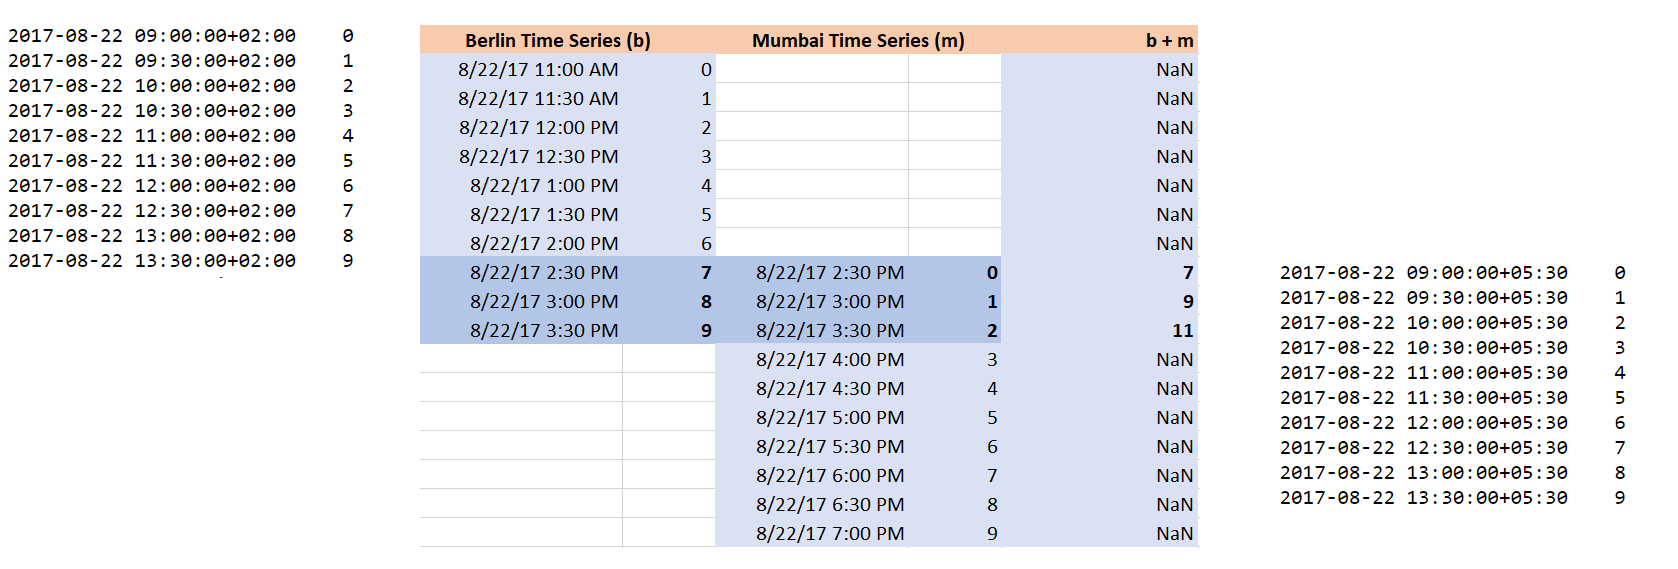